In [1]:
#when we fit the model, we'll have to convert all data frames into ndarrays 
#feature(independent variable)
#we are predicting GPA using the single feature, the SAT score
#x:input or feature
#Y:output or target 
#supervised learning 
#usually, the targets are historical values that correspond to a given SAT score 
#Our algorithm will find the optimal coeffcients of a linear regression model

# When we fit the model, we'll have to convert all data frames into ndarrays 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('101SIM~1.CSV')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
x = data['SAT']
y = data['GPA']

In [5]:
# They are both vectors of length 84

In [6]:
x.shape

(84,)

In [7]:
y.shape

(84,)

In [8]:
# we must reshape X into a matrix (2D project)
#in this way we are not changing anything but the dimensionality 

x_matrix = x.values.reshape(-1,1) 
x_matrix.shape

(84, 1)

In [9]:
reg = LinearRegression()

# 'reg' is now an instance of the LinearRegression class

In [10]:
reg.fit(x_matrix,y)

#sklearn has a different order than statsmodels 

#standardization: the process of subtracting the mean and dividing by the standard deviation 
#(a type of normalization - subtract the mean, divide by the L2-norm of the inputs)
#fit_intercept : add a constant . if you don't want an intercept, set it to false 

# n_jobs is a parameter used when we want to parallelize routines 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# R-squared 

reg.score(x_matrix,y)

0.40600391479679765

In [12]:
# Coefficients

reg.coef_

array([0.00165569])

In [13]:
# Intercept
# a float instead of array: a simple linear regression always has an intercept.

reg.intercept_

0.275040299660279

Make predictions 

In [14]:
reg.predict([[1740]])

array([3.15593751])

In [15]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [16]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [17]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


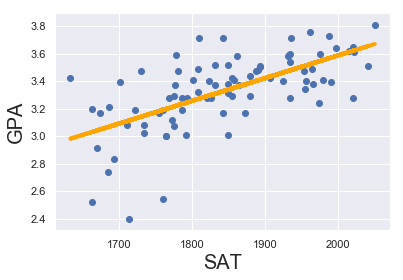

In [18]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x + 0.275
fig = plt.plot(x, yhat, lw =4, c ='orange', label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()